In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


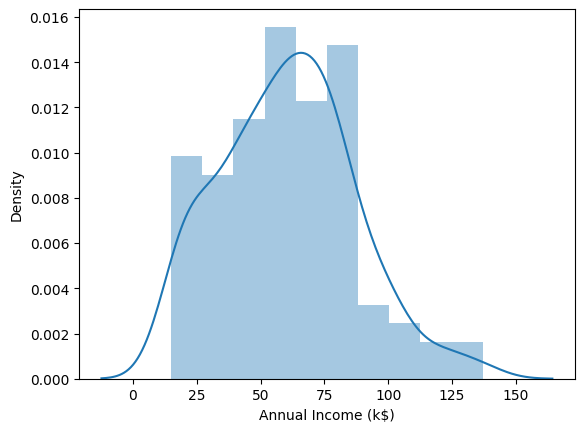

In [24]:
sns.distplot(df['Annual Income (k$)']);

In [25]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

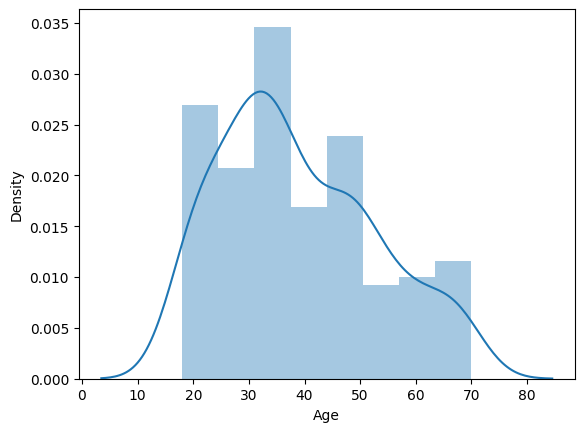

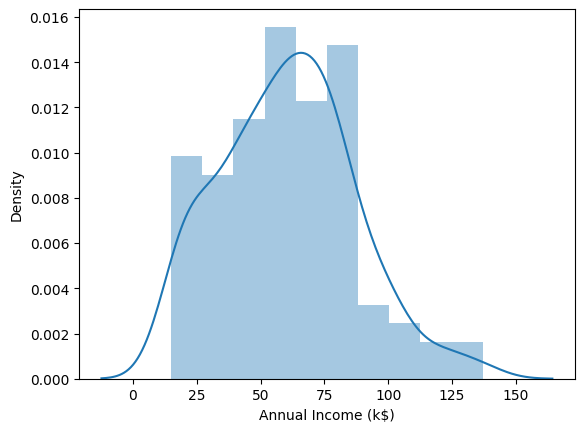

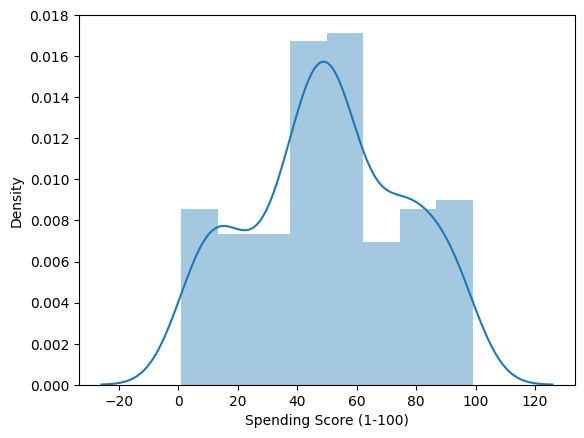

In [26]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

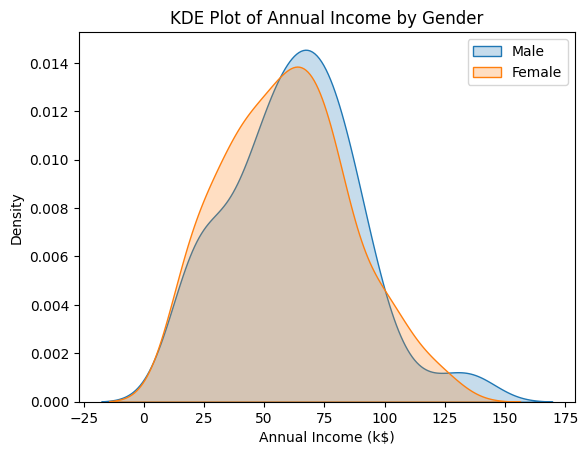

In [27]:
sns.kdeplot(df[df['Gender'] == 'Male']['Annual Income (k$)'], shade=True, label='Male')
sns.kdeplot(df[df['Gender'] == 'Female']['Annual Income (k$)'], shade=True, label='Female')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.title('KDE Plot of Annual Income by Gender')
plt.legend()

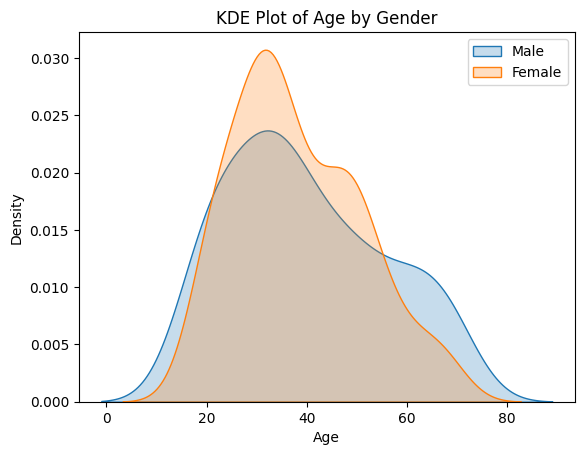

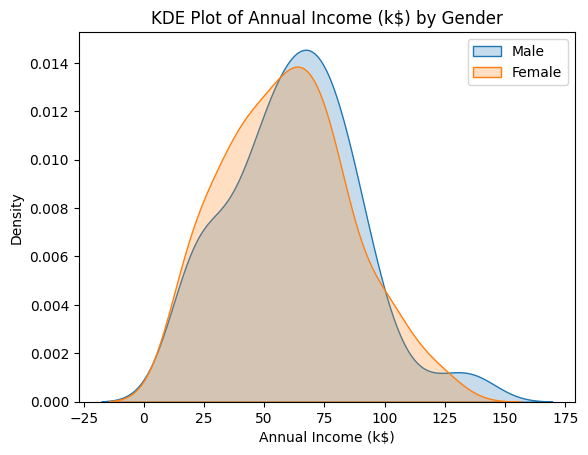

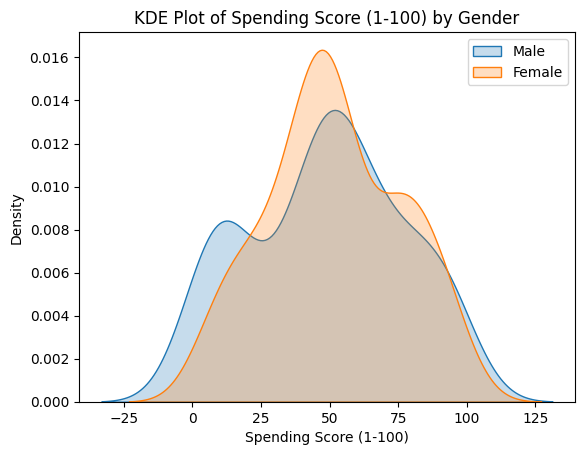

In [32]:
for i in columns:
    plt.figure()
    for gender in df['Gender'].unique():
        sns.kdeplot(df[df['Gender'] == gender][i], shade=True, label=gender)
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.title(f'KDE Plot of {i} by Gender')
    plt.legend()

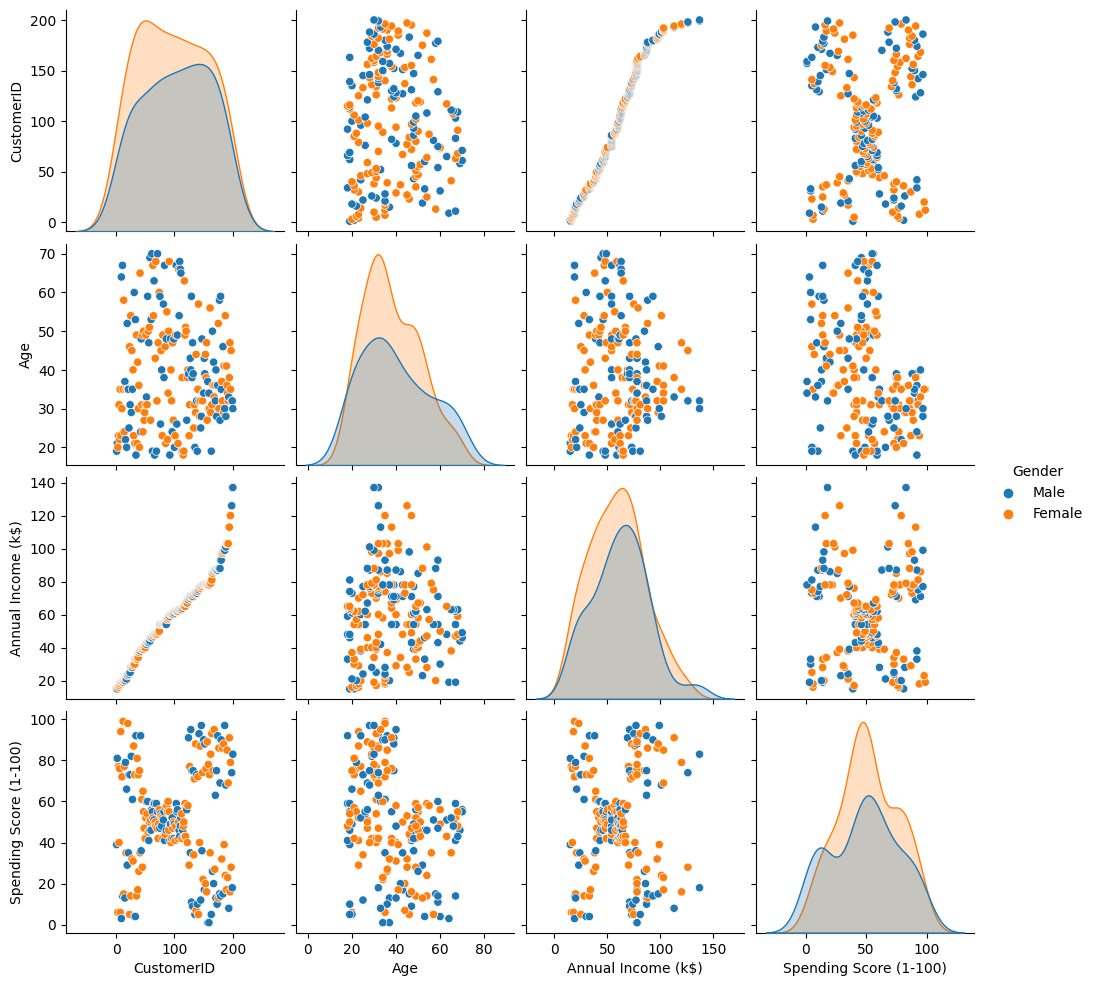

In [28]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [29]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [30]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

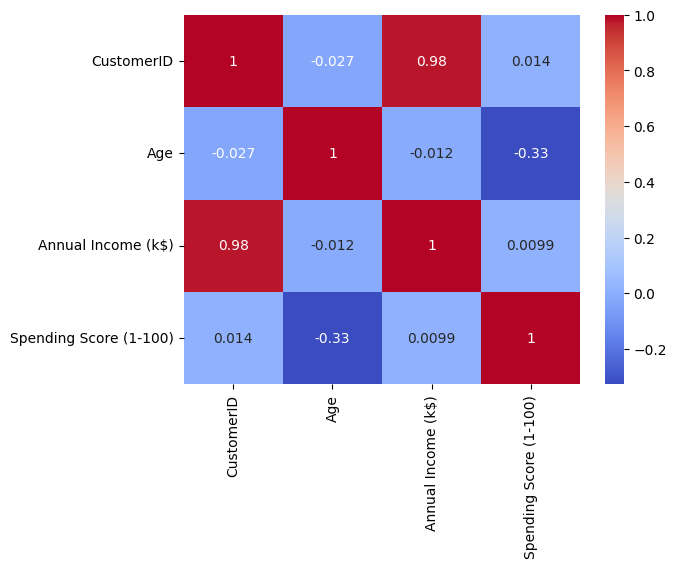

In [31]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')